# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Prediction texte partiel

---

# Initialisations
---

In [ ]:
_rs = 42

In [ ]:
cd ../..

In [ ]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Préparation Données

---

## Chargement

In [4]:
import patat.util.file

filename = 'data/prod/230517-OIDS-Label.pickle'

df_label = patat.util.file.pickle_load(filename)

In [5]:
df_label

,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,author,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h
0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,"[Accueil, Actualités, Communauté]",[L’Arabie saoudite a organisé un événement pou...,2022-10-31T00:00:00,,,Par Youcef -,...,0.0,0.0,,FB,Recueil,8,L’Arabie saoudite organise des célébrations d'...,2359,294.875000,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
1,https://lesmoutonsrebelles.com/les-reseaux-soc...,lesmoutonsrebelles.com,Les réseaux sociaux coupés volontairement ? Qu...,Il semblerait que la panne mondiale des réseau...,[],[Il semblerait que la panne mondiale des résea...,,,,,...,0.0,NaN,1,FB,Recueil,13,Les réseaux sociaux coupés volontairement ? Qu...,3723,286.384615,78521e5bf45d5d672a403958243a58fd95855660
2,https://lesmoutonsrebelles.com/un-rapport-du-p...,lesmoutonsrebelles.com,Un rapport du Pentagone affirme que les extrat...,Selon une énorme base de données de documents ...,[],[Selon une énorme base de données de documents...,,,,,...,0.0,NaN,1,FB,Recueil,17,Un rapport du Pentagone affirme que les extrat...,3545,208.529412,db5f4fe97288e2cb2982f2f3f084f299b4bac7a0
3,https://lesmoutonsrebelles.com/un-sondage-defa...,lesmoutonsrebelles.com,Un sondage défavorable pour Emmanuel Macron su...,"Des internautes, dont des politiques, ont affi...",[],"[Des internautes, dont des politiques, ont aff...",,,,,...,0.0,NaN,2,FB,Recueil,14,Un sondage défavorable pour Emmanuel Macron su...,1928,137.714286,8189af39fedefc6c901fc8b3a1717fdf5288d7fc
4,https://lemediaen442.fr/le-president-ukrainien...,lemediaen442.fr,Le président ukrainien Zelensky se cache dans ...,Le courage de Zelensky aura été de courte duré...,"[Politique, ukraine, volodymyr zelensky]",[Le courage de Zelensky aura été de courte dur...,2022-03-05T14:55:48+01:00,,,,...,0.0,NaN,3,FB,Recueil,8,Le président ukrainien Zelensky se cache dans ...,2045,255.625000,0c2e41f58ac869eb95865751caa3ab29a9f0cd13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,https://lezarceleurs.blogspot.com/2022/04/des-...,lezarceleurs.blogspot.com,Des victimes de test PCR témoignent,De : https://www.naturalnews.com/2022-04-21-vi...,"[accidents, COVID-19, Test PCR, victimes]",[ De : https://www.naturalnews.com/2022-04-21-...,,,NaN,,...,NaN,NaN,NaN,NaN,Verif,29,Des victimes de test PCR témoignent\n De : ht...,6042,208.344828,e6cf82ff921171ab67ac2b45ce27dca77a397c1a
902,https://www.francesoir.fr/politique-monde/resu...,www.francesoir.fr,Résultats de l’audit en Arizona : 54 000 bulle...,"CHRONIQUE - Le 24 septembre, le rapport d’audi...","[Accueil, Politique]","[CHRONIQUE - Le 24 septembre, le rapport d’aud...",2021-09-29T13:37:00,,NaN,"Auteur(s)\nElisabeth Dancet, pour FranceSoir",...,NaN,NaN,NaN,NaN,Verif,12,Résultats de l’audit en Arizona : 54 000 bulle...,10542,878.500000,c587dbcf33207a0a5c066bcf21cff88cd9fe1c9d
903,https://www.francetvinfo.fr/meteo/orages/tempe...,www.francetvinfo.fr,Tempête Aurore : de puissantes rafales de vent...,Le département du Finistère a été frappé par l...,[],[Le département du Finistère a été frappé par ...,2021-10-21T22:53:00,La moitié nord de la France a été frappée par ...,NaN,"H. Puffeney, A.Lay, J. Jonas, J. Chouquet, Fra...",...,NaN,NaN,NaN,NaN,Verif,2,Tempête Aurore : de puissantes rafales de vent...,1378,689.000000,6a77dfe2e50deec474b1373bb7180e39a98bbd0d
904,https://www.francetvinfo.fr/sports/directs/dir...,www.francetvinfo.fr,Euro 2021 : revivez la victoire des Belges sur...,"Pour son quatrième tournoi majeur consécutif, ...",[],"[Pour son quatrième tournoi majeur consécutif,...",2021-06-27T20:14:00,Les tenants du titre portugais abandonnent leu...,NaN,franceinfo: sport,...,NaN,NaN,NaN,NaN,Verif,2,Euro 2021 : revivez la victoire des Belges sur...,828,414.000000,ec2b1e32cbac75d21b7ecfa1ea90d8

## Labels ou textes Nuls

In [6]:
df_label['text'].isna().sum()

0

In [7]:
df_label['infox'].isna().sum()

4

In [8]:
df_label = df_label[df_label['infox'].notna()]

In [9]:
df_label.reset_index(inplace=True)

## Données dupliquées

In [10]:
df_label.duplicated(subset='text').sum()

0

In [11]:
df_label.duplicated(subset='url').sum()

0

# Experience
---

## Paragraphes

In [12]:
df_label['p_count'].describe()

count    900.000000
mean      21.756667
std       29.650424
min        1.000000
25%        8.000000
50%       14.000000
75%       25.000000
max      512.000000
Name: p_count, dtype: float64

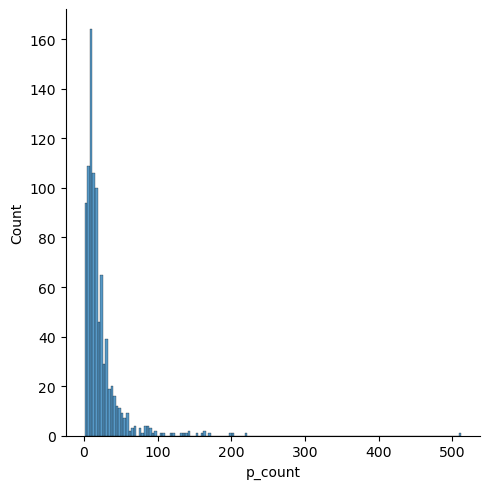

In [13]:
sns.displot(df_label,x='p_count')

## Normalisation et Lemmisation des paragraphes

In [14]:
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

In [15]:
import patat.util.text

def normalize_paragraphs(parags):
    results = []
    for p in parags:
        p_result =  patat.util.text.preprocess(p)
        p_result = ' '.join(lex.get_lemmas_from_text(p_result))
        results.append(p_result)
    return results

In [16]:
df_label['l_paragraphs']=df_label['paragraphs'].progress_apply(normalize_paragraphs)

  0%|          | 0/900 [00:00<?, ?it/s]

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_58141/870071176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['l_paragraphs']=df_label['paragraphs'].progress_apply(normalize_paragraphs)


## Normalisation et Lemmisation des textes

In [17]:
def join_l_parags(l_parags):
    return '\n'.join(l_parags)

In [18]:
df_label['l_text']=df_label['l_paragraphs'].progress_apply(join_l_parags)

  0%|          | 0/900 [00:00<?, ?it/s]

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_58141/3686178955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['l_text']=df_label['l_paragraphs'].progress_apply(join_l_parags)


## Stop words

In [19]:
df_words = lex.get_df_words(df_label['l_text'],df_label['infox'], 
        preprocessor=None, tokenizer=lex.get_words)

/opt/homebrew/Caskroom/miniforge/base/envs/pt39/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
def get_common_words(common_size):
    common_0 = df_words.sort_values('count_0.0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1.0',ascending=False).head(common_size).index
    return list(df_words[(df_words.index.isin(common_0))&(df_words.index.isin(common_1))].index)

In [21]:
stop_words = get_common_words(200)

In [22]:
get_common_words(100)

['de',
 'la',
 'le',
 'et',
 'les',
 'des',
 'en',
 'un',
 'est',
 'que',
 'du',
 'une',
 'être',
 'avoir',
 'pour',
 'qui',
 'dans',
 'il',
 'par',
 'pas',
 'sur',
 'au',
 'ce',
 'faire',
 'plaire',
 'qu',
 'ne',
 'pouvoir',
 'se',
 'avec',
 'tout',
 'nous',
 'son',
 'été',
 'mais',
 'ou',
 'aux',
 'on',
 'elle',
 'cette',
 'comme',
 'vous',
 'même',
 'je',
 'ces',
 'ils',
 'autre',
 'sa',
 'si',
 'devoir',
 'leur',
 'ses',
 'bien',
 'aussi',
 'pays',
 'grand',
 'aller',
 'dire',
 'voir',
 'an',
 'contre',
 'état',
 'sans',
 'après',
 'premier',
 'nouveau',
 'deux',
 'mettre',
 'monde',
 'entre',
 'depuis',
 'tous',
 'selon',
 'très',
 'personne',
 'leurs',
 'russie',
 'russe',
 'cela',
 'donner',
 'non',
 'dont',
 'où',
 'covid',
 'guerre',
 'uni']

In [23]:
def get_rare_words(nb_rare):
    return list(df_words[(df_words['count_0.0']<=nb_rare)&(df_words['count_1.0']<=nb_rare)].index)

In [24]:
get_rare_words(1)

['rétro',
 'accounted',
 'menachem',
 'lâchement',
 'lyssenko',
 'mchugh',
 'résonnais',
 'unioniste',
 'megan',
 'menard',
 'résorption',
 'arsani',
 'printanier',
 'magnétisme',
 'quadruplant',
 'procedure',
 'profane',
 'conjoncturel',
 'arnaqueur',
 'réformant',
 'aponte',
 'arnault',
 'réformatrice',
 'magnétoscope',
 'étroitesse',
 'magnétoencéphalographie',
 'réfléchissant',
 'profanation',
 'rétroactif',
 'pone',
 'unpopular',
 'conjonction',
 'léaument',
 'ars_pdl',
 'memoriam',
 'mdups',
 'continuateur',
 'maginnis',
 'memoria',
 'zoo',
 'acgaqdvwk',
 'magistère',
 'magnifier',
 'priorisation',
 'étable',
 'zoologique',
 'magneronresponsable',
 'arriviste',
 'lèche',
 'carglass',
 'priorise',
 'mcnamara',
 'quadriréacteur',
 'quité',
 'magma',
 'léa',
 'chimios',
 'macdo',
 'arnage',
 'lys',
 'macbook',
 'porque',
 'unvaccinated',
 'pornographie',
 'accoucheur',
 'connaissant',
 'lyndon',
 'consulting',
 'mailler',
 'zodiacs',
 'mendicité',
 'primo',
 'accroitre',
 'accroit',

## Equilibrage Dataset

<Axes: xlabel='infox', ylabel='count'>

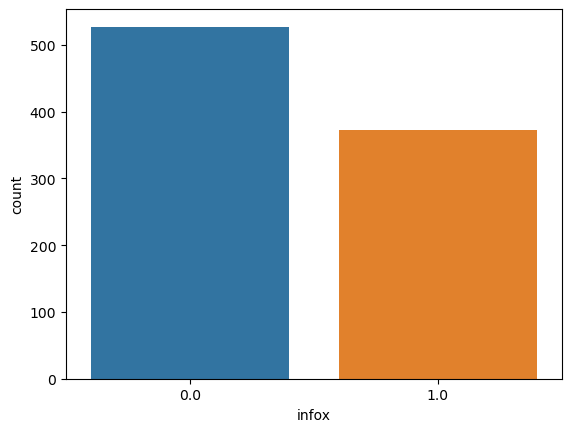

In [25]:
label_count = df_label['infox'].value_counts()
sns.barplot(x=label_count.index, y=label_count)

In [26]:
df_0 = df_label[df_label['infox'] == 0]
df_1 = df_label[df_label['infox'] == 1]

min_sample = min(len(df_0),len(df_1))


df_0=df_0.sample(min_sample,random_state=_rs)
df_1=df_1.sample(min_sample,random_state=_rs)
df_ml = pd.concat([df_0,df_1])

df_ml

,index,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,...,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h,l_paragraphs,l_text
609,610,https://www.francesoir.fr/politique-france/gue...,www.francesoir.fr,Guerre en Ukraine: Emmanuel Macron prévient le...,À l’occasion de la cérémonie pour le 78e anniv...,"[Accueil, Politique]",[À l’occasion de la cérémonie pour le 78e anni...,2022-08-20T00:00:00,,,...,,CN,Recueil,11,Guerre en Ukraine: Emmanuel Macron prévient le...,2629,239.000000,857bfacdd98e36dda26f1f92cf40c992904d6386,[occasion de la cérémonie pour le anniversaire...,occasion de la cérémonie pour le anniversaire ...
705,708,https://www.profession-gendarme.com/la-vaccina...,www.profession-gendarme.com,La vaccination Covid : un marquage de « type b...,De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonjo...,"[Actualités, Tribune]",[De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonj...,,,NaN,...,NaN,NaN,Test1,17,La vaccination Covid : un marquage de « type b...,6252,367.764706,166d32300f4d7766a82fe39a1185f35bc347c05f,[de dr date avril bonjour touspour les non méd...,de dr date avril bonjour touspour les non méde...
26,26,https://www.mondialisation.ca/colonialisme-ene...,www.mondialisation.ca,Colonialisme énergétique,Visite d’État du président de la République it...,"[Moyen-Orient et Afrique du Nord, Guerre USA O...",[Visite d’État du président de la République i...,2022-07-09T00:00:00,,Pangea Grandangolo,...,,GP,Recueil,8,Colonialisme énergétique\nVisite d’État du pré...,2794,349.250000,2a39a60fd5e2c6df0f6ec8ce9fedc2ee2eb4ab4d,[visite état du présider de la république ital...,visite état du présider de la république itali...
565,566,https://www.francesoir.fr/opinions-editos/de-l...,www.francesoir.fr,De l’importance d’une Assemblée vraiment natio...,"Depuis hier soir, ne serions-nous pas en train...","[Accueil, Opinions]","[Depuis hier soir, ne serions-nous pas en trai...",2022-06-20T19:46:00,,Xavier Azalbert,...,,GP,Recueil,16,De l’importance d’une Assemblée vraiment natio...,4582,286.375000,93b25370fea82c7039f7e2b00c0bd73151101af3,[depuis hier soir ne être nous pas en train as...,depuis hier soir ne être nous pas en train ass...
231,232,https://www.polemia.com/quelle-politique-migra...,www.polemia.com,Quelle politique migratoire pour la France ? –...,"Par André-Victor Robert, haut fonctionnaire ♦ ...","[Accueil, Géopolitique, Afrique, analyse, Andr...","[Facebook, Twitter, LinkedIn, Print Friendly, ...",,"Par André-Victor Robert, haut fonctionnaire ♦ ...",André Victor Robert,...,,FB,Recueil,31,Quelle politique migratoire pour la France ? –...,9123,294.290323,c12a81bb99810b5c13fba93abc5f9cea077a873d,"[facebook, twitter, linkedin, print friendly, ...",facebook\ntwitter\nlinkedin\nprint friendly\nl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,https://lesdeqodeurs.fr/des-scientifiques-de-h...,lesdeqodeurs.fr,Des scientifiques de Harvard et de Johns Hopki...,Article original datant du 31/08/22 par SSRNCO...,"[ARNm, COVID, effets secondaires, étude, Harva...",[Les étudiants des universités nord-américaine...,2022-09-23T00:00:00,,,...,1,FB,Recueil,5,Des scientifiques de Harvard et de Johns Hopki...,1803,360.600000,1f56ed5fa54de7c492154ac8ee0d8d10724f1aa4,[les étudiant des université nord américain ri...,les étudiant des université nord américain ris...
157,158,https://www.voltairenet.org/article217546.html,www.voltairenet.org,L’armée russe achète des exemplaires d’armemen...,L’achat de deux canons automoteurs CAESAR fran...,[],[L’achat de deux canons automoteurs CAESAR fra...,1900-01-01T00:00:00,,,...,1,FB,Recueil,3,L’armée russe achète des exemplaires d’armemen...,718,239.333333,b3153ba0ad9e32c02a8d49c99a6748e0764b20b5,[achat de deux caner automoteur caesar françai...,achat de deux caner automoteur caesar français...
522,523,https://lemediaen442.fr/onu-le-premier-ministr...,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal d

## Textes partiels

In [27]:
def partial_texts(text,p_count):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

In [28]:
text = df_ml.sample(frac=1).iloc[0]['l_text']

In [31]:
print(text)

le mai le ministère ukrainien de la culture et de la politique de information ordonner institut ukrainien du livre de détruire tous les ouvrage éditer en russie publier en langue russe ou traduire de la langue russe
selon la directeur de institut du livre et ancien président du forum des éditeur oleksandra koval photo il agir de détruire au minimum million de livre qui véhiculer le mal certain ouvrage être conserver par des bibliothèque universitaire pour être étudier par des chercheur sur origine du mal
cette autodafé applique tous les classique de la littérature russe alexandre pouchkine léon tolstoï en passant par fiodor dostoïevski
cette information été masquer par ancien ministre suédois des affaire étranger carl bildt qui avoir publier le mai un message sur twitter retirer depuis accuser la russie de brûler des livre ukrainien imputation purement mensonger
deux leçon tirer de ces événement on avoir pas assister de telles destruction de livre depuis la second guerre mondial et les

In [32]:
pt = partial_texts(text,2)
print(pt)

le mai le ministère ukrainien de la culture et de la politique de information ordonner institut ukrainien du livre de détruire tous les ouvrage éditer en russie publier en langue russe ou traduire de la langue russe
selon la directeur de institut du livre et ancien président du forum des éditeur oleksandra koval photo il agir de détruire au minimum million de livre qui véhiculer le mal certain ouvrage être conserver par des bibliothèque universitaire pour être étudier par des chercheur sur origine du mal


## Tests Entrainement

In [33]:
df_ml=df_ml.sample(frac=1,random_state=_rs)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [35]:
logreg = LogisticRegression(C=200, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)
neuralnet = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=_rs)

In [36]:
#iw = get_common_words(20)
#iw = get_rare_words(1)
iw=None
pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=None, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])

pipelineMLPC = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=None, tokenizer=None, stop_words=iw)), 
    ('classifier',neuralnet)
                  ])

In [38]:
def cut_text(text):
    return partial_texts(text,nb_parags)

In [44]:
df_means = {}
for nb_parags in [1,2,3,5,8,13,21,34,200]:
    
    print(f'Crossvalidating nb_parags={nb_parags}')

    X = df_ml['text'].apply(cut_text)
    y = df_ml['infox']

    #classifier = pipelineMLPC
    classifier = pipelineLR
    scores = cross_validate(classifier, X, y, cv=4,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    df_means[nb_parags] = df_scores.describe().loc['mean']


Crossvalidating nb_parags=1
Crossvalidating nb_parags=2
Crossvalidating nb_parags=3
Crossvalidating nb_parags=5
Crossvalidating nb_parags=8
Crossvalidating nb_parags=13
Crossvalidating nb_parags=21
Crossvalidating nb_parags=34
Crossvalidating nb_parags=200


In [45]:
pd.set_option('display.precision',3)
bench = pd.DataFrame(df_means)
bench

,1,2,3,5,8,13,21,34,200
fit_time,0.023,0.054,0.087,0.143,0.226,0.289,0.364,0.410,0.549
score_time,0.006,0.012,0.020,0.034,0.051,0.072,0.094,0.112,0.145
test_roc_auc,0.662,0.783,0.774,0.812,0.821,0.838,0.844,0.849,0.853
test_f1,0.631,0.720,0.702,0.744,0.743,0.770,0.772,0.781,0.790
test_accuracy,0.615,0.714,0.696,0.740,0.735,0.765,0.764,0.775,0.787
test_precision,0.607,0.708,0.689,0.733,0.722,0.756,0.747,0.761,0.781
test_recall,0.657,0.732,0.716,0.756,0.767,0.785,0.799,0.802,0.799


In [46]:
bench.loc[['test_accuracy','test_f1'],[5,8,13]]

,5,8,13
test_accuracy,0.740,0.735,0.765
test_f1,0.744,0.743,0.770


In [47]:
bench.loc[['test_accuracy','test_f1'],[5,8,13]]

,5,8,13
test_accuracy,0.740,0.735,0.765
test_f1,0.744,0.743,0.770


<Axes: >

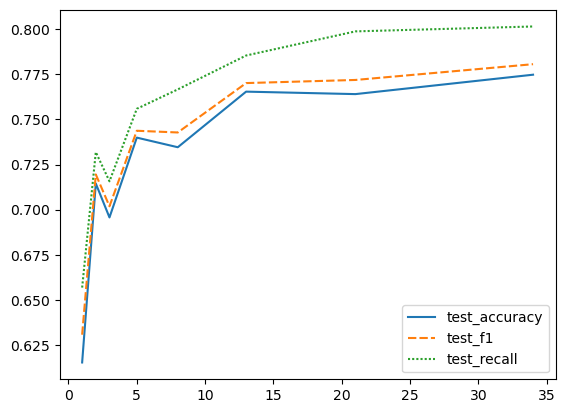

In [43]:
sns.lineplot(data=bench.T[['test_accuracy','test_f1','test_recall']])

In [ ]:
sns.scatterplot(data=bench.T,x='test_accuracy',y='test_recall',hue=bench.T.index)

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---

In [ ]:
# notebook specific tqddm progress bar for nested tqdm progress bars
import tqdm
from time import sleep

for i in tqdm.notebook.trange(4, desc='1st loop'):
    for j in tqdm.notebook.tqdm(range(4), desc='2nd loop'):
        sleep(1)